In [22]:
import torch
from model import Model
from torch.autograd import Variable
from train_mnist import evaluate, test_X, test_y
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [3]:
w = Variable(torch.linspace(.5, 1.5, 10))
d = torch.load('tmp_model_16.pt')
model = Model.from_dict(w, 16*16+1, 10, d)
print(model.layer_sizes())
model

tensor([13., 10.,  6.])


Model(
  (hidden_layers): ModuleList(
    (0): ConcatLayer(
      (linear): TertiaryLinear(in_features=257, out_features=13, bias=False)
      (activation): ActModule()
    )
    (1): ConcatLayer(
      (linear): TertiaryLinear(in_features=270, out_features=10, bias=False)
      (activation): ActModule()
    )
    (2): ConcatLayer(
      (linear): TertiaryLinear(in_features=280, out_features=6, bias=False)
      (activation): ActModule()
    )
  )
  (output_layer): ConcatLayer(
    (linear): TertiaryLinear(in_features=286, out_features=10, bias=False)
    (activation): ActModule()
  )
  (softmax): Softmax(dim=-1)
)

In [4]:
model.cleanup()
print(model.layer_sizes())
model

tensor([7., 3.])


Model(
  (hidden_layers): ModuleList(
    (0): ConcatLayer(
      (linear): TertiaryLinear(in_features=257, out_features=7, bias=False)
      (activation): ActModule()
    )
    (1): ConcatLayer(
      (linear): TertiaryLinear(in_features=264, out_features=3, bias=False)
      (activation): ActModule()
    )
  )
  (output_layer): ConcatLayer(
    (linear): TertiaryLinear(in_features=267, out_features=10, bias=False)
    (activation): ActModule()
  )
  (softmax): Softmax(dim=-1)
)

0.75922


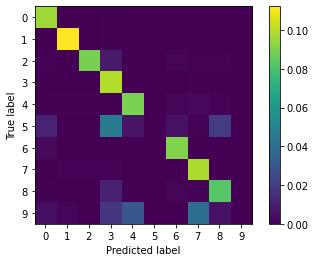

In [26]:
x = test_X.unsqueeze(dim=0).expand((model.shared_weight.size()[0], -1, -1))

predict_out = model(x).view(-1, model.out_features)

_, predict_y = torch.max(predict_out, 1)

acc = accuracy_score(test_y.repeat(model.shared_weight.size()).data, predict_y.data)

print (acc)

cm = confusion_matrix(test_y.repeat(model.shared_weight.size()), predict_y, normalize='all')
disp = ConfusionMatrixDisplay(cm, np.arange(10))
disp.plot(include_values=False)